In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime

Web Scrapping UFC Fighters

In [2]:
url_base = "http://ufcstats.com/statistics/fighters?char={}&page=all"

In [3]:
letters = "abcdefghijklmnopqrstuvwxyz"
all_fighters = []

In [4]:
for letter in letters:
    url = url_base.format(letter)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    table = soup.find("table", class_="b-statistics__table")
    if table is None:
        continue

    rows = table.find_all("tr")[1:]

    for row in rows:
        cols = row.find_all("td")
        if len(cols) < 10:
            continue
        name = cols[0].text.strip()
        link = cols[0].find("a")["href"]
        surname = cols[1].text.strip()
        nickname = cols[2].text.strip()
        height = cols[3].text.strip()
        weight = cols[4].text.strip()
        reach = cols[5].text.strip()
        stance = cols[6].text.strip()
        wins = cols[7].text.strip()
        losses = cols[8].text.strip()
        draws = cols[9].text.strip()
        
        all_fighters.append({
            "Name": name,
            "Profile_URL": link,
            "Surname": surname,
            "Nickname": nickname, 
            "Height": height,
            "Weight": weight,
            "Reach": reach,
            "Stance": stance,
            "Wins": wins,
            "Losses": losses,
            "Draws": draws
        })

In [5]:
df_fighters = pd.DataFrame(all_fighters)

In [ ]:
df_fighters.to_csv('/Users/erikurbano/ufc_fighters_all.csv',index=False)

In [7]:
df_fighters = pd.read_csv('/Users/erikurbano/ufc_fighters_all.csv')

In [8]:
df_fighters = df_fighters.drop(columns=['Profile_URL','Reach','Nickname','Height','Stance'])

In [9]:
def clean(series):
    series = series.str.upper().str.strip()
    return series.str.title()

In [10]:
df_fighters['Name'] = df_fighters['Name'].fillna('') + ' ' + df_fighters['Surname'].fillna('')
df_fighters["Name"] = clean(df_fighters["Name"])
df_fighters = df_fighters.drop(columns='Surname')

In [11]:
df_fighters = df_fighters[(df_fighters['Wins'] != 0) | (df_fighters['Losses'] != 0) | (df_fighters['Draws'] != 0)]
df_fighters = df_fighters.reset_index(drop=True)

CSV DE KAGGLE

In [12]:
df = pd.read_csv('/Users/erikurbano/Downloads/pro_mma_fighters.csv')

Peleadores sin nombre

In [13]:
df.loc[3715, 'fighter_name'] = 'Hunter Tucker'
df.loc[3978, 'fighter_name'] = 'Noad Lahat'
df.loc[4740, 'fighter_name'] = 'AJ Matthews'

Sacamos columnas que no queremos

In [14]:
df = df.drop(columns=['url','nickname','death_date','age','location'])
df = df.drop(columns=['height','weight','association','wins','wins_ko','wins_submission','wins_decision','wins_other','lossess','losses_ko','losses_submission','losses_decision','losses_other'])

Funcion limpieza Palabras

In [15]:
df["fighter_name"] = clean(df["fighter_name"])

Nuevos nombres columnas

In [16]:
df = df.rename(columns={'fighter_name':'Name','country':'Country','weight_class':'Weight Class','birth_date':'Birth Date'})

Juntamos los dos dataframes

In [17]:
df_final=pd.merge(df_fighters,df, on='Name')

Limpiamos Country

In [18]:
df_final['Country'] = clean(df_final['Country'])
df_final['Country'] = df_final['Country'].replace({'Usa':'United States'})

Cambiamos el record a integer

In [19]:
df_final[['Wins', 'Losses', 'Draws']] = df_final[['Wins', 'Losses', 'Draws']].astype(int)

Cambiamos valores de columnas : Weight, Weight Class, Country

In [20]:
df_final.loc[333, ['Weight']] = ['205 lbs.']
df_final.loc[417, ['Weight']] = ['145 lbs.']
df_final.loc[863, ['Weight']] = ['185 lbs.']
df_final.loc[1732, ['Weight']] = ['145 lbs.']
df_final.loc[2120, ['Weight']] = ['205 lbs.']
df_final.loc[2442, ['Weight']] = ['265 lbs.']   
df_final.loc[2405, ['Weight']] = ['265 lbs.']   
df_final.loc[1930, ['Weight']] = ['265 lbs.']   
df_final.loc[1140, ['Weight']] = ['265 lbs.']   
df_final.loc[28, ['Weight Class','Country']] = ['Middleweight', 'United States']
df_final.loc[195, ['Weight','Weight Class']] = ['216 lbs.','Heavyweight']
df_final.loc[377, ['Weight Class','Country']] = ['Middleweight','United States']
df_final.loc[427, ['Weight Class','Country']] = ['Super Heavyweight', 'United States']
df_final.loc[923, ['Weight','Weight Class','Country']] = ['205 lbs.','Lightheavyweight', 'United States']
df_final.loc[1216, ['Weight Class','Country']] = ['Lightheavyweight','United States']
df_final.loc[1236, ['Weight','Weight Class','Country']] = ['195 lbs.','Lightheavyweight','United States']
df_final.loc[1368, ['Weight','Weight Class']] = ['265 lbs.','Heavyweight']
df_final.loc[1438, ['Weight Class','Country']] = ['Welterweight','Brazil']
df_final.loc[1611, ['Weight','Weight Class']] = ['205 lbs.','Lightheavyweight']
df_final.loc[1994, ['Weight','Weight Class','Country']] = ['170 lbs.','Welterweight','Brazil']
df_final.loc[1995, ['Weight','Weight Class','Country']] = ['185 lbs.','Middleweight','Brazil']
df_final.loc[2461, ['Weight','Weight Class']] = ['265 lbs.','Heavyweight']
df_final.loc[720, ['Weight']] = ['265 lbs.']
df_final.loc[874, ['Weight']] = ['265 lbs.']
df_final.loc[924, ['Weight']] = ['265 lbs.']
df_final.loc[980, ['Weight']] = ['265 lbs.']    
df_final.loc[2357, ['Country']] = ['Brazil']
df_final.loc[89, ['Country']] = ['Afganistan']
df_final.loc[231, ['Country']] = ['Australia']
df_final.loc[2419, ['Country']] = ['Hungary']
df_final.loc[980, ['Weight']] = ['265 lbs.']
df_final.loc[1078, ['Weight Class','Country']] = ['Super Heavyweight', 'Australia']
df_final.loc[783, ['Weight Class']] = ['Lightweight']
df_final.loc[500, ['Weight']] = ['155 lbs.']


Cambiamos todos los nulos que podemos de Birth Date

In [21]:
df_final.loc[14, ['Birth Date']] = ['20/01/1969']
df_final.loc[89, ['Birth Date']] = ['02/12/1997']
df_final.loc[152, ['Birth Date']] = ['09/12/1981']
df_final.loc[161, ['Birth Date']] = ['19/09/1976']
df_final.loc[171, ['Birth Date']] = ['31/10/1995']
df_final.loc[199, ['Birth Date']] = ['05/10/1965']
df_final.loc[204, ['Birth Date']] = ['14/04/1969']
df_final.loc[212, ['Birth Date']] = ['15/11/1986']
df_final.loc[226, ['Birth Date']] = ['30/06/1989']
df_final.loc[231, ['Birth Date']] = ['20/10/1972']
df_final.loc[236, ['Birth Date']] = ['22/01/1980']
df_final.loc[346, ['Birth Date']] = ['31/12/1981']
df_final.loc[350, ['Birth Date']] = ['27/05/1985']
df_final.loc[392, ['Birth Date']] = ['07/11/1978']
df_final.loc[395, ['Birth Date']] = ['23/01/1990']
df_final.loc[429, ['Birth Date']] = ['27/11/1987']
df_final.loc[431, ['Birth Date']] = ['07/11/1979']
df_final.at[500, 'Birth Date'] = pd.NaT
df_final.loc[521, ['Birth Date']] = ['22/11/1985']
df_final.loc[547, ['Birth Date']] = ['22/09/1973']
df_final.loc[565, ['Birth Date']] = ['10/03/1987']
df_final.loc[575, ['Birth Date']] = ['10/05/1993']
df_final.loc[603, ['Birth Date']] = ['03/11/1988']
df_final.loc[610, ['Birth Date']] = ['06/10/1984']
df_final.loc[653, ['Birth Date']] = ['05/06/1980']
df_final.loc[677, ['Birth Date']] = ['10/12/1997']
df_final.loc[818, ['Birth Date']] = ['19/01/1991']
df_final.loc[864, ['Birth Date']] = ['24/08/1982']
df_final.loc[884, ['Birth Date']] = ['06/12/1996']
df_final.loc[891, ['Birth Date']] = ['04/04/1979']
df_final.loc[914, ['Birth Date']] = ['28/04/1986']
df_final.loc[929, ['Birth Date']] = ['21/02/1964']
df_final.loc[935, ['Birth Date']] = ['11/05/1986']
df_final.loc[962, ['Birth Date']] = ['09/05/1995']
df_final.loc[1001, ['Birth Date']] = ['30/05/1969']
df_final.loc[1034, ['Birth Date']] = ['08/11/1976']
df_final.loc[1047, ['Birth Date']] = ['23/11/1963']
df_final.loc[1978, ['Birth Date']] = ['26/08/1965']
df_final.loc[1152, ['Birth Date']] = ['25/05/1997']
df_final.loc[1264, ['Birth Date']] = ['21/11/1973']
df_final.loc[1293, ['Birth Date']] = ['28/07/1980']
df_final.loc[1399, ['Birth Date']] = ['09/03/1986']
df_final.loc[1421, ['Birth Date']] = ['21/06/1981']
df_final.loc[1444, ['Birth Date']] = ['16/01/1984']
df_final.loc[1530, ['Birth Date']] = ['01/11/1979']
df_final.loc[1544, ['Birth Date']] = ['20/02/1988']
df_final.loc[1558, ['Birth Date']] = ['15/07/1993']
df_final.loc[1599, ['Birth Date']] = ['11/11/1966']
df_final.loc[1655, ['Birth Date']] = ['12/04/1986']
df_final.loc[1656, ['Birth Date']] = ['20/03/1986']
df_final.loc[1706, ['Birth Date']] = ['04/12/1975']
df_final.loc[1753, ['Birth Date']] = ['07/05/1991']
df_final.loc[1760, ['Birth Date']] = ['10/04/1989']
df_final.loc[1790, ['Birth Date']] = ['09/11/1982']
df_final.loc[1809, ['Birth Date']] = ['22/01/1987']
df_final.loc[1823, ['Birth Date']] = ['28/04/1984']
df_final.loc[1831, ['Birth Date']] = ['01/10/1990']
df_final.loc[1837, ['Birth Date']] = ['21/10/1982']
df_final.loc[1894, ['Birth Date']] = ['17/01/1984']
df_final.loc[1911, ['Birth Date']] = ['18/02/1990']
df_final.loc[1941, ['Birth Date']] = ['06/10/1977']
df_final.loc[1943, ['Birth Date']] = ['10/06/1967']
df_final.loc[1993, ['Birth Date']] = ['18/01/1980']
df_final.loc[2005, ['Birth Date']] = ['16/01/1963']
df_final.loc[2036, ['Birth Date']] = ['02/06/1973']
df_final.loc[2037, ['Birth Date']] = ['26/06/1960']
df_final.loc[2039, ['Birth Date']] = ['05/04/1987']
df_final.loc[2059, ['Birth Date']] = ['16/09/1991']
df_final.loc[2071, ['Birth Date']] = ['09/02/1975']
df_final.loc[2075, ['Birth Date']] = ['20/01/1990']
df_final.loc[2100, ['Birth Date']] = ['09/12/1964']
df_final.loc[2110, ['Birth Date']] = ['09/05/1997']
df_final.loc[2150, ['Birth Date']] = ['04/12/1986']
df_final.loc[2161, ['Birth Date']] = ['04/04/1976']
df_final.loc[2214, ['Birth Date']] = ['07/07/1969']
df_final.loc[2222, ['Birth Date']] = ['17/08/1963']
df_final.loc[2231, ['Birth Date']] = ['17/12/1981']
df_final.loc[2279, ['Birth Date']] = ['05/12/1993']
df_final.loc[2280, ['Birth Date']] = ['31/03/1983']
df_final.loc[2292, ['Birth Date']] = ['01/01/1983']
df_final.loc[2349, ['Birth Date']] = ['19/10/1966']
df_final.loc[2357, ['Birth Date']] = ['03/08/1973']
df_final.loc[2408, ['Birth Date']] = ['09/01/1999']
df_final.loc[2419, ['Birth Date']] = ['13/09/1975']
df_final.loc[2435, ['Birth Date']] = ['10/02/1979']
df_final.loc[2450, ['Birth Date']] = ['17/07/1987']
df_final.loc[2468, ['Birth Date']] = ['18/10/1975']
df_final.loc[2474, ['Birth Date']] = ['23/05/1994']
df_final.loc[783, ['Birth Date']] = ['29/08/1989']
df_final.loc[1069, ['Birth Date']] = ['07/02/1986']

Buscamos la edad de los luchadores mediante el Birth Date y creamos nueva columna Age

In [ ]:
df_final['Birth Date'] = pd.to_datetime(df_final['Birth Date'], format="%d/%m/%Y", errors='coerce')

fecha_corte = datetime(2025, 5, 9)

df_final['Age'] = df_final['Birth Date'].apply(
    lambda x: fecha_corte.year - x.year - ((fecha_corte.month, fecha_corte.day) < (x.month, x.day)) if pd.notnull(x) else None
)

df_final['Age'] = df_final['Age'].astype('Int64')

Eliminamos duplicados

In [23]:
df_final.drop(index=[113,321,782,819,1061,1070,1408,2090,2096,2095], inplace=True)

In [24]:
df_final = df_final.reset_index(drop=True)

Traemos el excel creado a csv y nombrando las dos columnas que necesitamos

In [25]:
df_last_fight = pd.read_csv('/Users/erikurbano/Desktop/Names_and_last_fight.csv', encoding='latin1', sep=';')

df_last_fight = df_last_fight.iloc[:, :2]

df_last_fight.columns = ['Name', 'Last Fight']

Juntamos los df

In [26]:
df_final2=pd.merge(df_final,df_last_fight, on='Name')

Usamos datetime para la columna Last Fight

In [27]:
df_final2['Last Fight'] = pd.to_datetime(df_final2['Last Fight'], format='mixed', dayfirst=True)

Funcion para calcular el año de retiro

In [ ]:
def calcular_retirement_age(row):
    if row['Last Fight'].year >= 2023:
        return "Active"
    
    if pd.isna(row['Age']):
        return "Retired"
    
    birth_year = datetime.now().year - row['Age']
    edad_en_ultima_pelea = row['Last Fight'].year - birth_year
    return edad_en_ultima_pelea

df_final2['Retirement Age'] = df_final2.apply(calcular_retirement_age, axis=1)

Función para calcular la epoca de los peleadores

In [48]:
def asignar_epoca(row):
    año_retiro = row['Last Fight'].year
    
    if año_retiro <= 2002:
        return "90's"
    elif año_retiro <= 2012:
        return "2000's"
    else:
        return "2010's"

df_final2['Era'] = df_final2.apply(asignar_epoca, axis=1)

Eliminar filas duplicadas y resetear el index

In [30]:
df_final2.drop(index=[498,502,1060,1067,2090,2093], inplace=True)
df_final2 = df_final2.reset_index(drop=True)

Eliminamos columna Birth Date

In [32]:
df_final2 = df_final2.drop(columns=['Birth Date'])

Arreglamos valres de Weight Class

In [ ]:
df_final2['Weight Class'] = df_final2['Weight Class'].replace({'Lightheavyweight':'Light Heavyweight','Atomweight':'Strawweight'})

Importamos librerias necesarias para las representaciones graficas

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

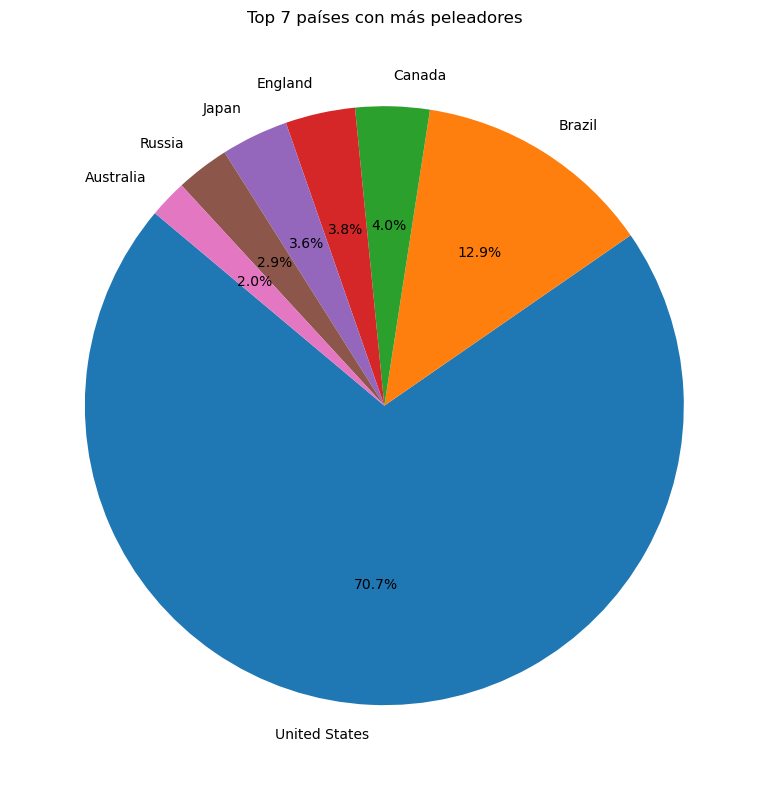

In [37]:
top_countries = df_final2['Country'].value_counts().nlargest(7)
plt.figure(figsize=(8,8))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 7 países con más peleadores')
plt.tight_layout()
plt.show()

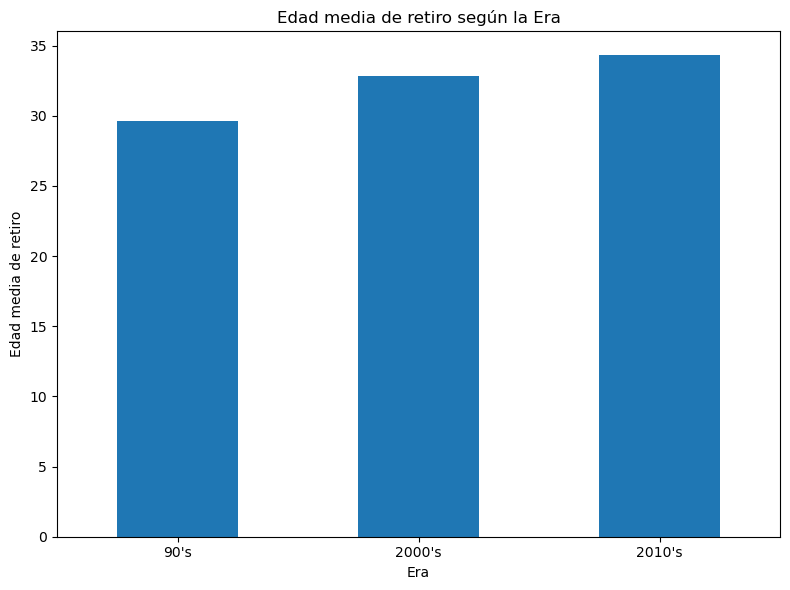

In [52]:
df_final2['Retirement Age'] = pd.to_numeric(df_final2['Retirement Age'], errors='coerce')

ordered_eras = ["90's", "2000's", "2010's"]
mean_retirement_age = df_final2.groupby('Era')['Retirement Age'].mean().reindex(ordered_eras)

plt.figure(figsize=(8,6))
mean_retirement_age.plot(kind='bar')
plt.ylabel('Edad media de retiro')
plt.title('Edad media de retiro según la Era')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

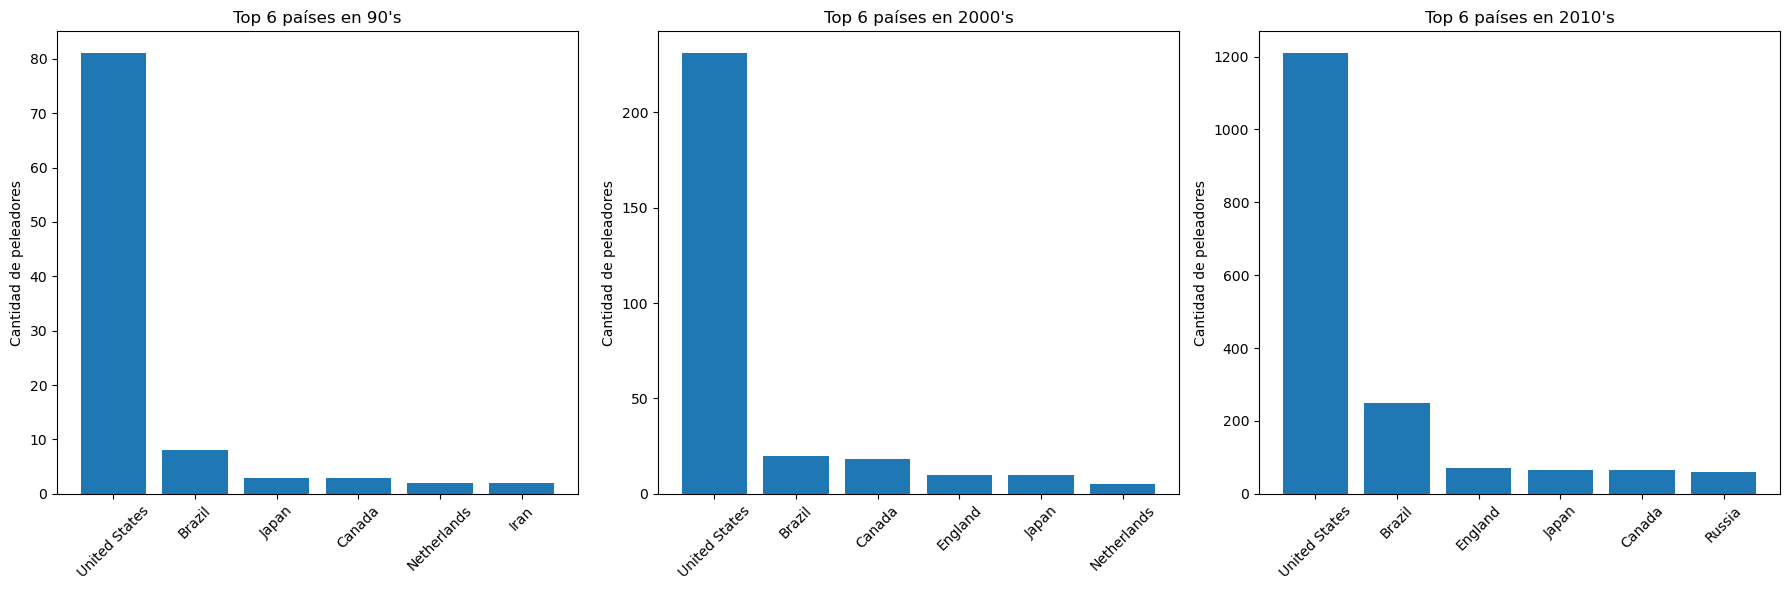

In [39]:
eras = ["90's", "2000's", "2010's"]
fig, axs = plt.subplots(1, 3, figsize=(18,6))

for i, era in enumerate(eras):
    era_df = df_final2[df_final2['Era'] == era]
    top_countries = era_df['Country'].value_counts().nlargest(6)
    
    axs[i].bar(top_countries.index, top_countries.values)
    axs[i].set_title(f"Top 6 países en {era}")
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].set_ylabel('Cantidad de peleadores')

plt.tight_layout()
plt.show()

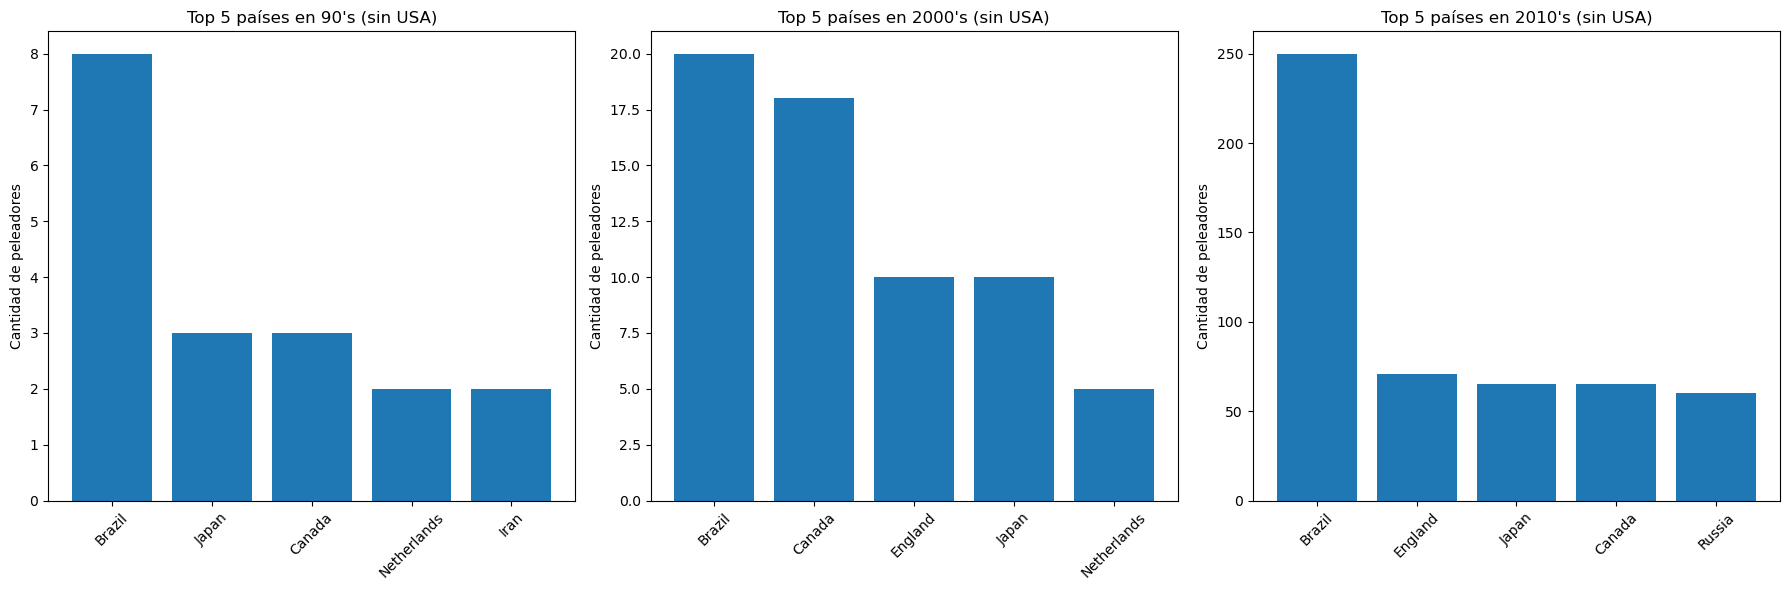

In [40]:
eras = ["90's", "2000's", "2010's"]
fig, axs = plt.subplots(1, 3, figsize=(18,6))

for i, era in enumerate(eras):
    era_df = df_final2[(df_final2['Era'] == era) & (df_final2['Country'] != 'United States')]
    top_countries = era_df['Country'].value_counts().nlargest(5)
    
    axs[i].bar(top_countries.index, top_countries.values)
    axs[i].set_title(f"Top 5 países en {era} (sin USA)")
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].set_ylabel('Cantidad de peleadores')

plt.tight_layout()
plt.show()

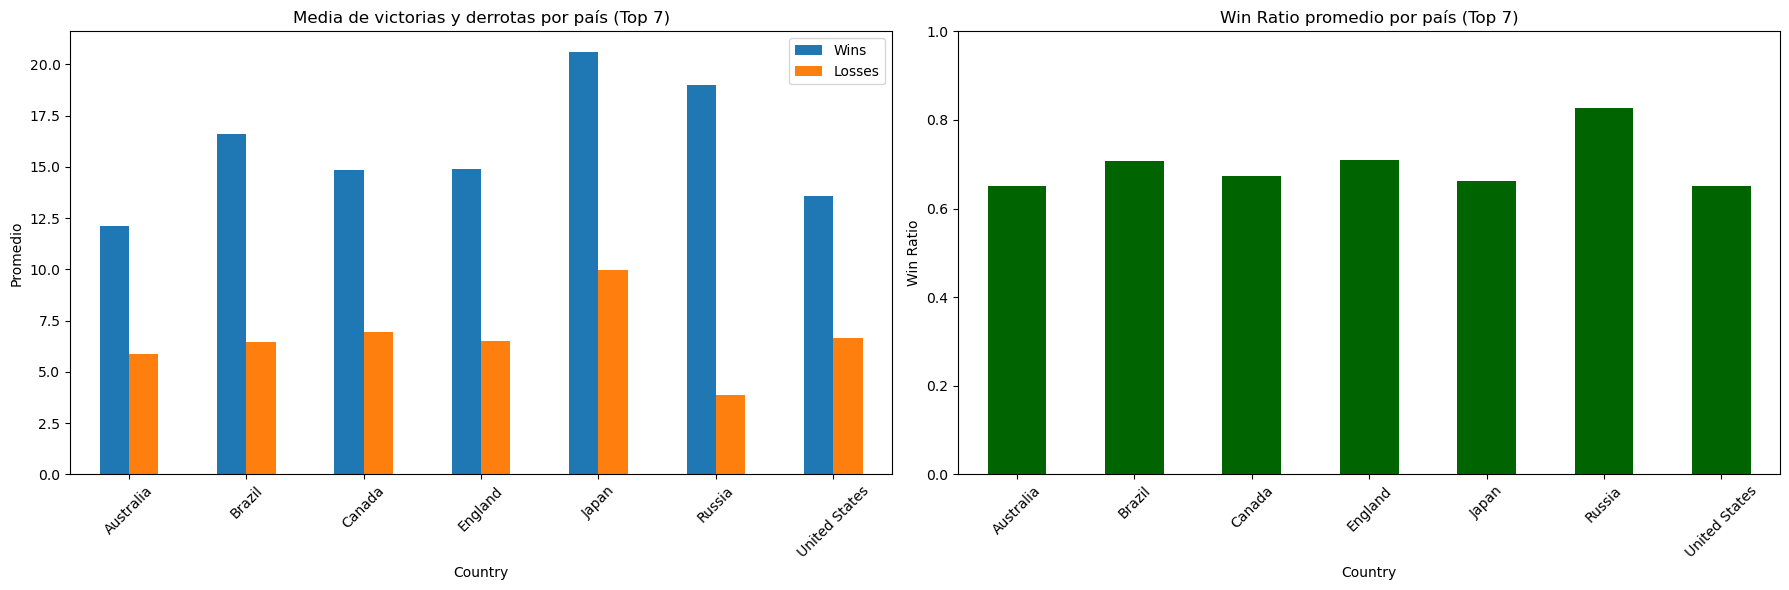

In [41]:
top_countries = df_final2['Country'].value_counts().nlargest(7).index
df_top = df_final2[df_final2['Country'].isin(top_countries)].copy()

# Calcular Win Ratio
df_top['Total_Fights'] = df_top['Wins'] + df_top['Losses']
df_top = df_top[df_top['Total_Fights'] > 0]  # Evitar división por cero
df_top['Win_Ratio'] = df_top['Wins'] / df_top['Total_Fights']

# Calcular medias por país
means = df_top.groupby('Country')[['Wins', 'Losses']].mean()
win_ratio_mean = df_top.groupby('Country')['Win_Ratio'].mean()

# Crear los subplots
fig, axs = plt.subplots(1, 2, figsize=(18,6))

# Gráfico 1: Media de Wins y Losses
means.plot(kind='bar', ax=axs[0])
axs[0].set_title('Media de victorias y derrotas por país (Top 7)')
axs[0].set_ylabel('Promedio')
axs[0].tick_params(axis='x', rotation=45)

# Gráfico 2: Win Ratio
win_ratio_mean.plot(kind='bar', ax=axs[1], color='darkgreen')
axs[1].set_title('Win Ratio promedio por país (Top 7)')
axs[1].set_ylabel('Win Ratio')
axs[1].set_ylim(0, 1)
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

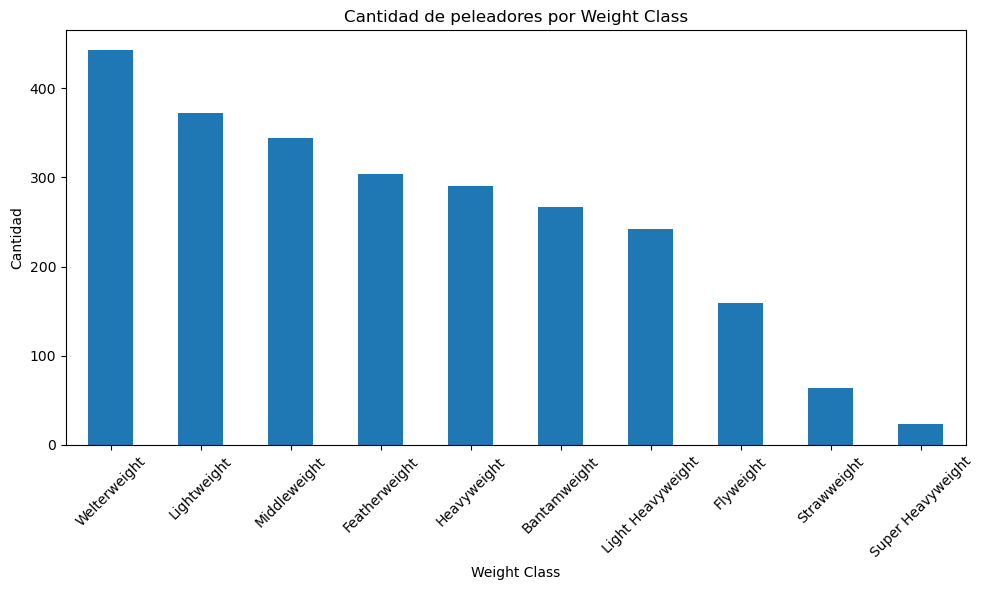

In [51]:
plt.figure(figsize=(10,6))
df_final2['Weight Class'].value_counts().plot(kind='bar')
plt.title('Cantidad de peleadores por Weight Class')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


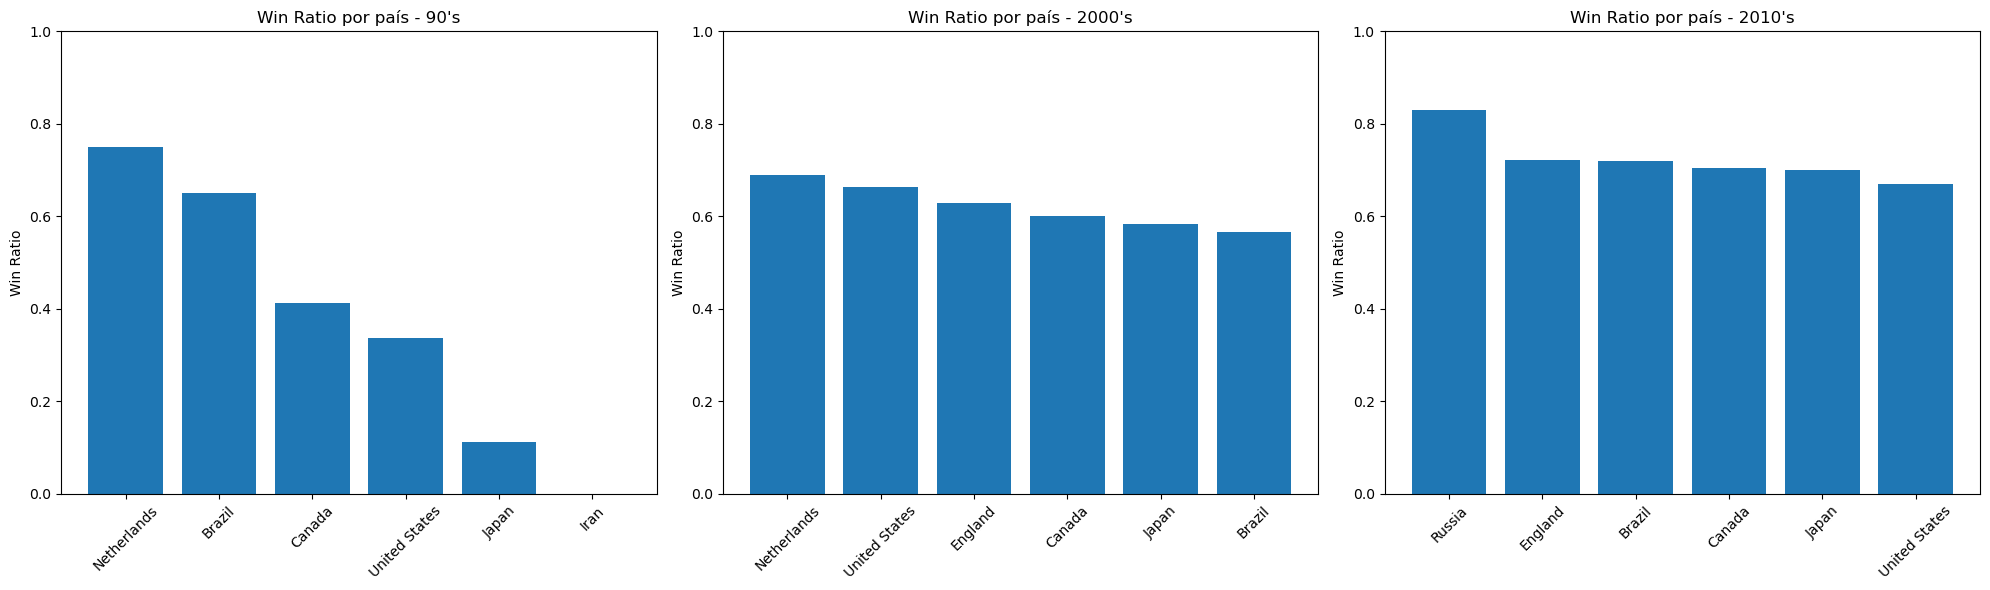

In [43]:
df_final2['Total_Fights'] = df_final2['Wins'] + df_final2['Losses']
df_final2 = df_final2[df_final2['Total_Fights'] > 0].copy()
df_final2['Win_Ratio'] = df_final2['Wins'] / df_final2['Total_Fights']

# Configurar eras
eras = ["90's", "2000's", "2010's"]
fig, axs = plt.subplots(1, 3, figsize=(20,6))

for i, era in enumerate(eras):
    era_df = df_final2[df_final2['Era'] == era]
    
    # Top 6 países con más peleadores en esta era
    top_countries = era_df['Country'].value_counts().nlargest(6).index
    df_top = era_df[era_df['Country'].isin(top_countries)]
    
    # Calcular win ratio promedio por país
    win_ratios = df_top.groupby('Country')['Win_Ratio'].mean().sort_values(ascending=False)
    
    # Graficar
    axs[i].bar(win_ratios.index, win_ratios.values)
    axs[i].set_title(f'Win Ratio por país - {era}')
    axs[i].set_ylim(0, 1)
    axs[i].set_ylabel('Win Ratio')
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()